In [1]:
%load_ext autoreload
%autoreload 2
    

<font size="6"> 
   PREPROCESS AND SAVE THE DATA
</font> 

In [2]:
import os
import numpy as np
import pandas as pd
import pickle
import itertools
import sklearn
import warnings
import featuretools as ft
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")

feat_to_keep =['n_living_child_03', 'visit_med_03', 'tobacco_12', 'rrelgimp_03', 'rinc_pension_12', 'employment_12', 'glob_hlth_03', 'n_iadl_03', 'exer_3xwk_03', 'exer_3xwk_12', 'sad_12', 'decis_famil_03', 'adl_bath_03', 'seg_pop_12', 'insured_03', 'decis_personal_12', 'iadl_meds_03', 'enjoy_03', 'energetic_03', 'rrelgwk_12', 'hypertension_12', 'pem_def_mar_03', 'adl_walk_03', 'out_proc_12', 'iadl_meals_03', 'adl_bed_12', 'attends_club_12', 'happy_12', 'sinc_pension_03', 'rjob_hrswk_12', 'hincome_03', 'ragender', 'decis_personal_03', 'satis_ideal_12', 'volunteer_12', 'arthritis_12', 'tobacco_03', 'iadl_meals_12', 'lonely_03', 'restless_03', 'test_pres_03', 'rameduc_m', 'edu_gru_03', 'bmi_03', 'n_adl_12', 'memory_12', 'alcohol_12', 'hinc_assets_12', 'rearnings_03', 'migration_03', 'test_chol_03', 'cancer_03', 'diabetes_12', 'hinc_rent_03', 'imss_03', 'imss_12', 'care_adult_12', 'adl_bath_12', 'iadl_money_12', 'insur_other_03', 'sgender_03', 'stroke_12', 'happy_03', 'searnings_12', 'hard_12', 'adl_dress_03', 'a21_12', 'tired_12', 'wouldnt_change_12', 'hypertension_03', 'issste_12', 'restless_12', 'adl_toilet_12', 'insur_private_12', 'diabetes_03', 'stroke_03', 'adl_bed_03', 'hard_03', 'n_illnesses_12', 'adl_eat_12', 'test_tuber_03', 'cosas_imp_12', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'migration_12', 'rsocact_m_12', 'n_mar_03', 'adl_eat_03', 'cesd_depressed_03', 'hosp_12', 'adl_walk_12', 'rjlocc_m_03', 'hinc_assets_03', 'hrt_attack_12', 'insured_12', 'test_diab_03', 'n_mar_12', 'adl_toilet_03', 'cancer_12', 'n_adl_03', 'sad_03', 'a22_12', 'out_proc_03', 'visit_med_12', 'a16a_12', 'care_child_12', 'resp_ill_12', 'n_living_child_12', 'depressed_03', 'a33b_12', 'glob_hlth_12', 'reads_12', 'pem_def_mar_12', 'games_12', 'iadl_money_03', 'rjlocc_m_12', 'comms_tel_comp_12', 'rrelgimp_12', 'j11_12', 'year', 'rrfcntx_m_12', 'age_03', 'age_12', 'edu_gru_12', 'bmi_12', 'table_games_12', 'sewing_12', 'uid']
#these set of features was computed using recursive feature elimination using Shapley values as described in the report
final = ['year of assessment','age_03.MEAN(customer.rafeduc_m)', 'hinc_assets_03', 'age_12.MEAN(customer.volunteer_12)', 'uid.SUM(customer.games_12)', 
                'age_12.MEAN(customer.satis_ideal_12)', 'care_adult_12', 'memory_12', 'uid.MAX(customer.hincome_03)', 'age_12.MEAN(customer.seg_pop_12)', 'age_12.MEAN(customer.visit_dental_12)', 'insur_other_03', 'age_12.MEAN(customer.n_depr_03)', 'hard_12', 'a21_12', 'age_12.MEAN(customer.diabetes_03)', 'employment_12', 'n_living_child_12', 'imss_03', 'age_12.MEAN(customer.bmi_03)', 'games_12', 'insur_private_12', 'n_adl_12', 'age_12.MEAN(customer.bmi_12)', 'age_12.MEAN(customer.tired_03)', 'age_12.MEAN(customer.table_games_12)', 'adl_walk_12', 'age_12.MAX(customer.rearnings_12)', 'age_03.MEAN(customer.hinc_business_12)', 'age_03.MEAN(customer.energetic_12)', 'out_proc_03', 'uid.SUM(customer.reads_12)', 'hrt_attack_12', 'hinc_rent_03', 'adl_dress_03', 'adl_toilet_03', 'seg_pop_12', 'age_12.MEAN(customer.rafeduc_m)', 'iadl_meals_03', 'happy_12', 'uid.SUM(customer.bmi_12)', 'uid.MAX(customer.games_12)', 'restless_03', 'migration_03', 'hard_03', 'age_12.MEAN(customer.reads_12)', 'rrfcntx_m_12', 'care_child_12', 'glob_hlth_12', 'uid.MAX(customer.edu_gru_03)', 'insured_03', 'enjoy_03', 'age_03.MEAN(customer.rjob_end_03)', 'insured_12', 'lonely_03', 'resp_ill_03', 'age_03.MEAN(customer.rearnings_03)', 'uid.MAX(customer.edu_gru_12)', 'age_03.MEAN(customer.depressed_03)', 'volunteer_12', 'out_proc_12', 'age_12.MIN(customer.a16a_12)', 'age_12.MEAN(customer.cancer_03)', 'age_03.MEAN(customer.care_adult_12)', 'cosas_imp_12', 'bmi_03', 'age_12.MEAN(customer.care_adult_12)', 'attends_club_12', 'pem_def_mar_03', 'age_12.MEAN(customer.searnings_03)', 'tobacco_03', 'adl_eat_12', 'age_03.MEAN(customer.games_12)', 'edu_gru_03', 'age_12.MEAN(customer.attends_club_12)', 'stroke_12', 'age_12.MEAN(customer.rjob_end_12)', 'age_12.MEAN(customer.games_12)', 'age_03.MEAN(customer.rearnings_12)', 'age_12.MEAN(customer.energetic_12)', 'age_12.MEAN(customer.cesd_depressed_03)', 'age_03.MIN(customer.rjob_end_03)', 'age_03.MEAN(customer.edu_gru_12)', 'age_12.MEAN(customer.exer_3xwk_12)', 'age_03.MEAN(customer.tobacco_12)', 'age_03.MEAN(customer.visit_dental_03)', 'test_tuber_03', 'age_12.MIN(customer.rjob_end_03)', 'age_03.MEAN(customer.bmi_12)', 'iadl_money_12', 'age_03.MEAN(customer.adl_bed_03)', 'sad_12', 'age_03.MEAN(customer.a16a_12)', 'adl_bath_03', 'table_games_12', 'hrt_attack_03', 'decis_personal_03', 'age_03.MEAN(customer.visit_dental_12)', 'age_12.MEAN(customer.n_mar_03)', 'rafeduc_m', 'rsocact_m_12', 'bmi_12', 'age_12.MEAN(customer.hincome_03)', 'age_03.MAX(customer.rearnings_12)', 'age_03.MEAN(customer.searnings_03)', 'stroke_03', 'hosp_12', 'iadl_meals_12', 'age_12.MEAN(customer.edu_gru_12)', 'age_03.MEAN(customer.exer_3xwk_12)', 'age_03.MAX(customer.hinc_rent_03)', 'age_03.MEAN(customer.rjob_end_12)', 'age_03.MEAN(customer.comms_tel_comp_12)', 'iadl_meds_03', 'age_03.MEAN(customer.hincome_03)', 'tobacco_12', 'age_12.MEAN(customer.rameduc_m)', 'age_12.MEAN(customer.alcohol_12)', 'age_03.MEAN(customer.care_child_12)', 'age_12.MEAN(customer.insur_private_03)', 'age_12.MEAN(customer.attends_class_12)', 'age_12.SUM(customer.searnings_12)', 'age_03.MEAN(customer.rjob_hrswk_12)', 'age_12.SUM(customer.rjob_hrswk_12)', 'age_03.MIN(customer.a16a_12)', 'age_03.MEAN(customer.volunteer_12)', 'adl_eat_03', 'age_03.MEAN(customer.rameduc_m)', 'age_12.MEAN(customer.rearnings_12)', 'j11_12', 'age_12.MEAN(customer.tobacco_12)', 'age_12.MIN(customer.n_mar_03)', 'age_03.MEAN(customer.restless_12)', 'n_living_child_03', 'age_12.MEAN(customer.care_child_12)', 'age_03.MEAN(customer.sewing_12)', 'rjob_hrswk_12', 'age_12.MEAN(customer.act_mant_12)', 'age_03.MEAN(customer.attends_club_12)', 'age_03.MEAN(customer.cancer_03)', 'diabetes_03', 'cancer_03', 'uid.MAX(customer.reads_12)', 'age_03.MEAN(customer.act_mant_12)', 'age_03.MEAN(customer.seg_pop_12)', 'age_12.MEAN(customer.hinc_rent_03)', 'age_12.MEAN(customer.a16a_12)', 'imss_12', 'age_03.MEAN(customer.depressed_12)', 'decis_personal_12', 'age_03.MEAN(customer.hincome_12)', 'age_03.MEAN(customer.bmi_03)', 'age_12', 'age_03.MIN(customer.rjob_end_12)', 'age_03.MEAN(customer.tobacco_03)', 'age_03.MEAN(customer.diabetes_12)', 'cancer_12', 'age_03.MEAN(customer.hinc_cap_12)', 'age_03.MEAN(customer.diabetes_03)', 'diabetes_12', 'age_03.MEAN(customer.hinc_rent_03)', 'age_03.MEAN(customer.attends_class_12)', 'age_03.MEAN(customer.sinc_pension_12)', 'age_12.MAX(customer.n_iadl_12)', 'a16a_12', 'age_12.MEAN(customer.rjob_hrswk_12)', 'reads_12', 'rjlocc_m_12', 'year', 'age_03.MEAN(customer.edu_gru_03)', 'age_03', 'edu_gru_12', 'uid.SUM(customer.edu_gru_12)', 'sewing_12']

www = [i for i in final if i not in feat_to_keep]

#make sure the script is executed from the parent directory where the repo has been cloned
base_dir = os.getcwd()
data_found = False
try:
   y =  pd.read_csv(os.path.join(base_dir, 'data','raw','train_labels.csv'))
   train = pd.read_csv(os.path.join(base_dir, 'data','raw','train_features.csv'))
   test = pd.read_csv(os.path.join(base_dir, 'data','raw','test_features.csv'))
   data_found =True
except:
   print('data not found in the /data/raw folder. Please either a) add the data in the appropriate folder or b) make sure this Python script is executed from the parent directory where the git repository has been downloaded')  



if data_found:
    data =pd.concat((train,test))
    ids = train['uid'].unique()
    
    ####################################################################
    # decis_personal_* loads as float for 03 and object for 12. Make this consistent
    r = {'1. A lot': '1', '2. A little': '2', '3. None': '3'}
    data['decis_personal_12'] = data['decis_personal_12'].replace(r).astype('float')
    object_cols = data.select_dtypes(include=['object']).columns
    for col in object_cols:
        data[col] = data[col].astype('category')
        data[col] = pd.Categorical(data[col])
    
    data_gbm = data.copy()
    ##########################################################################
    data =pd.concat((train,test))
    data['decis_personal_12'] = data['decis_personal_12'].replace(r).astype('float')
    #for catboost convert data into category after filling the nans with '' as catboost does not support nan in categorical features
    data[object_cols]=  data[object_cols ].fillna(' ')
    # Convert the object columns to category dtype
    for col in object_cols:
        data[col] = data[col].astype('category')
        data[col] = pd.Categorical(data[col])
        
    data_cat = data.copy()
    del train, test, data
    ###########################################################################
    
    ###########################################################################
    ##convert certain 'ordered' categorical features (e.g age) into numerical features. This is expected to 
    #improve the explanatory power of the model, as, after the conversion  we can exploit the 'ordered' nature of these features
    candidate = [
        'age_',
        'n_living_child',
        'glob_hlth',
        'bmi',
        'satis_ideal',
        'memory',
        'rafeduc',
        'rameduc',
        'rsocact_m',
        'rrfcntx_m',
        'exer_3xwk',
        'edu_']
    temp = pd.DataFrame()
    q = []
    for i in object_cols:
        for j in candidate:
            if j in i:
    
                idx = np.nonzero(data_gbm[i].notnull().values)[0]
                temp[i] = pd.Series(index=data_gbm.index).astype(str)
                temp[i].iloc[idx] = data_gbm[i].iloc[idx].apply(
                    lambda x: x.split('.')[0])
                temp[i] = temp[i].astype(float)
                break
    # there are 4 subjects for whom the age in 2003 is higher than the age in 2012
    # This is clearly an error. We replace the age feature for those subjects
    # with a missing value.
    idx = np.nonzero((temp['age_03'] > temp['age_12']).values)[0]
    temp.iloc[idx]['age_03'] = np.nan
    temp.iloc[idx]['age_12'] = np.nan
    converted = temp.columns
    orig = [i for i in data_cat.columns if i not in converted]
    data_cat = pd.concat([data_cat[orig], temp], axis=1)
    data_gbm = pd.concat([data_gbm[orig], temp], axis=1)
    
    ###############################################################################
    y =  pd.read_csv(os.path.join(base_dir, 'data','raw','train_labels.csv'))
    ss = pd.read_csv(os.path.join(base_dir, 'data','raw','submission_format.csv'))
                                  
    y = pd.concat((y,ss))
    data_cat =  pd.merge(data_cat, y, on='uid', how='left')
    data_gbm =  pd.merge(data_gbm, y, on='uid', how='left')
    del data_cat['composite_score']
    ################################################################################
    idx_train =  np.nonzero (data_gbm['uid'].isin(ids).values)[0]
    idx_test =  np.nonzero (~data_gbm ['uid'].isin(ids).values)[0]
    #######################################################################################
    ####add the estimated age at time of assessment feature
    data = data_gbm.copy()
    data['year of assessment'] =np.nan
    both  = np.nonzero( (data['age_03']+data['age_12']).notnull().values)[0]
    only_2012  = np.nonzero( (data['age_03'].isnull() & (data['age_12']).notnull()).values)[0]
    only_2003  = np.nonzero( (data['age_12'].isnull() & (data['age_03']).notnull()).values)[0]
    idx_2016  = np.nonzero( (data['year']==2016).values)[0]
    idx_2021  = np.nonzero( (data['year']==2021).values)[0]
    a =list(set(both).intersection(set(idx_2016)))
    data['year of assessment'] .iloc[a] = (data['age_03']+data['age_12']).iloc[a]/2+.95
    a =list(set(both).intersection(set(idx_2021)))
    data['year of assessment'] .iloc[a] = (data['age_03']+data['age_12']).iloc[a]/2+ 1.35
    a =list(set(only_2012).intersection(set(idx_2016)))
    data['year of assessment'] .iloc[a] = data['age_12'].iloc[a]+.4
    a =list(set(only_2012).intersection(set(idx_2021)))
    data['year of assessment'] .iloc[a] =  data['age_12'].iloc[a]+.85
    a =list(set(only_2003).intersection(set(idx_2016)))
    data['year of assessment'] .iloc[a] = data['age_03'].iloc[a]+1.3
    a =list(set(only_2003).intersection(set(idx_2021)))
    data['year of assessment'] .iloc[a] = data['age_03'].iloc[a]+1.8
    data_gbm =data.copy()
    data_cat['year of assessment'] = data['year of assessment'] 
    del data
    ########################################################################################
    #########################################################################################
    data_cat['id ']=range(len(data_cat))
    es = ft.EntitySet(id='loan')
    es = es.add_dataframe(dataframe_name= 'customer', dataframe =data_cat ,index ='id')
    es = es.normalize_dataframe(base_dataframe_name='customer', new_dataframe_name='uid', index='uid')
    es = es.normalize_dataframe(base_dataframe_name='customer', new_dataframe_name='year', index='year')
        
    default_agg_primitives =  ["sum", "max", "min", "mean", "count"]
    feature_matrix, feature_names = ft.dfs(entityset = es, target_dataframe_name = 'customer',
                                               agg_primitives=default_agg_primitives, 
                                           max_depth = 2, features_only=False, verbose = True)
                                               
    data_cat_orig = data_cat[feat_to_keep[:-1]]
    data_gbm_orig =data_gbm[feat_to_keep[:-1]]
    y =data_gbm['composite_score']
    
    feature_matrix =feature_matrix[[ i for i in feature_matrix.columns if i in www]]
    
    data_cat = pd.concat([data_cat,feature_matrix],axis =1)
    data_gbm = pd.concat([data_gbm,feature_matrix],axis =1)
    del feature_matrix
    
    data_gbm   = data_gbm.loc[:, ~data_gbm.columns.duplicated()].drop(columns =['composite_score','uid'], axis=1)
    data_cat  =  data_cat.loc[:, ~data_cat.columns.duplicated()].drop(columns =['id','uid', 'id'], axis=1)
    
    ####################################################################################################
    # prepare data for TabM
    #note that the y variable for the test set (released after the end of the competition) is only used to assess the performance
    test = pd.read_csv(os.path.join(base_dir, 'data','raw','test_features.csv'))
    y_test = pd.read_csv(os.path.join(base_dir, 'data','raw','test_labels.csv'))
    
    float_cols = data_cat.select_dtypes(include=['float']).columns
    cat_cols = [
        i for i in data_cat.columns if (
            i not in float_cols) & (
                i != 'uid') & (
                    i != 'id')]
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean .fit(data_cat.iloc[idx_train][float_cols])
    X_cont = imp_mean .transform(data_cat[float_cols]).astype(np.float32)
    #idx_test = range(len(idx_train), data_cat.shape[0])
    
    data_numpy = {
        'train': {'x_cont': X_cont[idx_train], 'y': y.iloc[idx_train].values},
        'val': {'x_cont': X_cont[idx_test], 'y': y_test['composite_score'].values},
        'test': {'x_cont': X_cont[idx_test], 'y': y_test['composite_score'].values}}
    
    
    # The noise is added to improve the output of QuantileTransformer in some cases.
    X_cont_train_numpy = data_numpy['train']['x_cont']
    noise = (
        np.random.default_rng(0)
        .normal(0.0, 1e-5, X_cont_train_numpy.shape)
        .astype(X_cont_train_numpy.dtype)
    )
    preprocessing = sklearn.preprocessing.QuantileTransformer(
        n_quantiles=max(min(len(idx) // 30, 1000), 10),
        output_distribution='normal',
        subsample=10**9,
    ).fit(X_cont_train_numpy + noise)
    del X_cont_train_numpy
    
    # Apply the preprocessing to the numerical features
    for part in data_numpy:
        data_numpy[part]['x_cont'] = preprocessing.transform(
            data_numpy[part]['x_cont'])
    
    #one hot encoding all the caterogical features and concatenate with the numerical features
    for i in range(len(cat_cols)):
        ohe = OneHotEncoder(handle_unknown='ignore')
        ohe.fit(data_cat[[cat_cols[i]]].iloc[idx])
        if i == 0:
            temp = ohe.transform(
                data_cat[[cat_cols[i]]]).toarray().astype(np.float32)
        else:
            temp = np.concatenate((temp, ohe.transform(
                data_cat[[cat_cols[i]]]).toarray().astype(np.float32)), 1)
    data_numpy['train']['x_cont'] = np.concatenate(
        (data_numpy['train']['x_cont'], temp[idx_train]), 1)
    data_numpy['val']['x_cont'] = np.concatenate(
        (data_numpy['val']['x_cont'], temp[idx_test]), 1)
    data_numpy['test']['x_cont'] = np.concatenate(
        (data_numpy['test']['x_cont'], temp[idx_test]), 1)
    ############################################################################################
    print('saving processed data')
    data_cat.to_csv(os.path.join(base_dir, 'data','processed','data_cat.csv'))
    data_gbm.to_csv(os.path.join(base_dir, 'data','processed','data_gbm.csv'))
    a = open(os.path.join(base_dir, 'data','processed','data_processed_for_tabM.pkl'), 'wb')
    pickle.dump(data_numpy, a)
    a.close()
    print('processed data for Catboost, Lightgbm and TabM saved')
    ############################################################################################


Built 1460 features
Elapsed: 00:06 | Progress: 100%|██████████
saving processed data
processed data for Catboost, Lightgbm and TabM saved


<font size="6"> 
TRAINING
</font> 

1) Tab-PFN is trained only if cuda is available and tabpfn has been succesfully imported). Note also that Tab-PFN can be fitted only if a valid internet connection is available as the base checkpoint is downloaded from Huggingface
2) we train the TabM model with only 1 seed but we used 5 different seeds in the Github repo

In [6]:
#!pip install "tabpfn-extensions[all] @ git+https://github.com/PriorLabs/tabpfn-extensions.git
!pip install tabpfn
!pip install rtdl_num_embeddings
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import pickle
import sklearn
from sklearn.metrics import mean_squared_error
import time
import itertools
from typing import Any, Literal
from sklearn.impute import SimpleImputer
import torch.nn as nn
from torch import Tensor
import math
import scipy.special
import random
import warnings
from typing import Literal, NamedTuple
import rtdl_num_embeddings  # https://github.com/yandex-research/rtdl-num-embeddings
import torch
import torch.nn.functional as F
import torch.optim
from tqdm.std import tqdm
import lightgbm as lgb
import catboost as cbt
from catboost import CatBoostRegressor, Pool
warnings.filterwarnings("ignore")
try:
    from tabpfn import TabPFNRegressor
except:
    pass


base_dir = os.getcwd()
data_found = False
try:
    data_cat  = pd.read_csv(os.path.join(base_dir,'data','processed','data_cat.csv'),index_col=0)
    data_gbm  = pd.read_csv(os.path.join(base_dir,'data','processed','data_gbm.csv'),index_col=0)
    y_train = pd.read_csv(os.path.join(base_dir, 'data','raw','train_labels.csv'))['composite_score']
    # this of course not used during the training
    y_test = pd.read_csv(os.path.join(base_dir, 'data','raw','train_labels.csv'))['composite_score']
    a = open(os.path.join(base_dir,'data','processed','data_processed_for_tabM.pkl'), 'rb')
    data_numpy = pickle.load(a)
    a.close()
    data_found =True
except:
   print('data not found in the /data/processed folder. Please run the preprocess_data.py script first ')  



# ======================================================================================
# Initialization
# ======================================================================================
def init_rsqrt_uniform_(x: Tensor, d: int) -> Tensor:
    assert d > 0
    d_rsqrt = d**-0.5
    return nn.init.uniform_(x, -d_rsqrt, d_rsqrt)


@torch.inference_mode()
def init_random_signs_(x: Tensor) -> Tensor:
    return x.bernoulli_(0.5).mul_(2).add_(-1)


# ======================================================================================
# Modules
# ======================================================================================
class NLinear(nn.Module):
    """N linear layers applied in parallel to N disjoint parts of the input.

    **Shape**

    - Input: ``(B, N, in_features)``
    - Output: ``(B, N, out_features)``

    The i-th linear layer is applied to the i-th matrix of the shape (B, in_features).

    Technically, this is a simplified version of delu.nn.NLinear:
    https://yura52.github.io/delu/stable/api/generated/delu.nn.NLinear.html.
    The difference is that this layer supports only 3D inputs
    with exactly one batch dimension. By contrast, delu.nn.NLinear supports
    any number of batch dimensions.
    """

    def __init__(
        self, n: int, in_features: int, out_features: int, bias: bool = True
    ) -> None:
        super().__init__()
        self.weight = nn.Parameter(torch.empty(n, in_features, out_features))
        self.bias = nn.Parameter(torch.empty(
            n, out_features)) if bias else None
        self.reset_parameters()

    def reset_parameters(self):
        d = self.weight.shape[-2]
        init_rsqrt_uniform_(self.weight, d)
        if self.bias is not None:
            init_rsqrt_uniform_(self.bias, d)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        assert x.ndim == 3
        assert x.shape[-(self.weight.ndim - 1):] == self.weight.shape[:-1]

        x = x.transpose(0, 1)
        x = x @ self.weight
        x = x.transpose(0, 1)
        if self.bias is not None:
            x = x + self.bias
        return x


class OneHotEncoding0d(nn.Module):
    # Input:  (*, n_cat_features=len(cardinalities))
    # Output: (*, sum(cardinalities))

    def __init__(self, cardinalities: list[int]) -> None:
        super().__init__()
        self._cardinalities = cardinalities

    def forward(self, x: Tensor) -> Tensor:
        assert x.ndim >= 1
        assert x.shape[-1] == len(self._cardinalities)

        return torch.cat(
            [
                # NOTE
                # This is a quick hack to support out-of-vocabulary categories.
                #
                # Recall that lib.data.transform_cat encodes categorical features
                # as follows:
                # - In-vocabulary values receive indices from `range(cardinality)`.
                # - All out-of-vocabulary values (i.e. new categories in validation
                #   and test data that are not presented in the training data)
                #   receive the index `cardinality`.
                #
                # As such, the line below will produce the standard one-hot encoding for
                # known categories, and the all-zeros encoding for unknown categories.
                # This may not be the best approach to deal with unknown values,
                # but should be enough for our purposes.
                nn.functional.one_hot(x[..., i], cardinality + 1)[..., :-1]
                for i, cardinality in enumerate(self._cardinalities)
            ],
            -1,
        )


class ScaleEnsemble(nn.Module):
    def __init__(
        self,
        k: int,
        d: int,
        *,
        init: Literal['ones', 'normal', 'random-signs'],
    ) -> None:
        super().__init__()
        self.weight = nn.Parameter(torch.empty(k, d))
        self._weight_init = init
        self.reset_parameters()

    def reset_parameters(self) -> None:
        if self._weight_init == 'ones':
            nn.init.ones_(self.weight)
        elif self._weight_init == 'normal':
            nn.init.normal_(self.weight)
        elif self._weight_init == 'random-signs':
            init_random_signs_(self.weight)
        else:
            raise ValueError(f'Unknown weight_init: {self._weight_init}')

    def forward(self, x: Tensor) -> Tensor:
        assert x.ndim >= 2
        return x * self.weight


class LinearEfficientEnsemble(nn.Module):
    """
    This layer is a more configurable version of the "BatchEnsemble" layer
    from the paper
    "BatchEnsemble: An Alternative Approach to Efficient Ensemble and Lifelong Learning"
    (link: https://arxiv.org/abs/2002.06715).

    First, this layer allows to select only some of the "ensembled" parts:
    - the input scaling  (r_i in the BatchEnsemble paper)
    - the output scaling (s_i in the BatchEnsemble paper)
    - the output bias    (not mentioned in the BatchEnsemble paper,
                          but is presented in public implementations)

    Second, the initialization of the scaling weights is configurable
    through the `scaling_init` argument.

    NOTE
    The term "adapter" is used in the TabM paper only to tell the story.
    The original BatchEnsemble paper does NOT use this term. So this class also
    avoids the term "adapter".
    """

    r: None | Tensor
    s: None | Tensor
    bias: None | Tensor

    def __init__(
        self,
        in_features: int,
        out_features: int,
        bias: bool = True,
        *,
        k: int,
        ensemble_scaling_in: bool,
        ensemble_scaling_out: bool,
        ensemble_bias: bool,
        scaling_init: Literal['ones', 'random-signs'],
    ):
        assert k > 0
        if ensemble_bias:
            assert bias
        super().__init__()

        self.weight = nn.Parameter(torch.empty(out_features, in_features))
        self.register_parameter(
            'r',
            (
                nn.Parameter(torch.empty(k, in_features))
                if ensemble_scaling_in
                else None
            ),  # type: ignore[code]
        )
        self.register_parameter(
            's',
            (
                nn.Parameter(torch.empty(k, out_features))
                if ensemble_scaling_out
                else None
            ),  # type: ignore[code]
        )
        self.register_parameter(
            'bias',
            (
                nn.Parameter(torch.empty(out_features))  # type: ignore[code]
                if bias and not ensemble_bias
                else nn.Parameter(torch.empty(k, out_features))
                if ensemble_bias
                else None
            ),
        )

        self.in_features = in_features
        self.out_features = out_features
        self.k = k
        self.scaling_init = scaling_init

        self.reset_parameters()

    def reset_parameters(self):
        init_rsqrt_uniform_(self.weight, self.in_features)
        scaling_init_fn = {'ones': nn.init.ones_,
                           'random-signs': init_random_signs_}[self.scaling_init]
        if self.r is not None:
            scaling_init_fn(self.r)
        if self.s is not None:
            scaling_init_fn(self.s)
        if self.bias is not None:
            bias_init = torch.empty(
                # NOTE: the shape of bias_init is (out_features,) not (k, out_features).
                # It means that all biases have the same initialization.
                # This is similar to having one shared bias plus
                # k zero-initialized non-shared biases.
                self.out_features,
                dtype=self.weight.dtype,
                device=self.weight.device,
            )
            bias_init = init_rsqrt_uniform_(bias_init, self.in_features)
            with torch.inference_mode():
                self.bias.copy_(bias_init)

    def forward(self, x: Tensor) -> Tensor:
        # x.shape == (B, K, D)
        assert x.ndim == 3

        # >>> The equation (5) from the BatchEnsemble paper (arXiv v2).
        if self.r is not None:
            x = x * self.r
        x = x @ self.weight.T
        if self.s is not None:
            x = x * self.s
        # <<<

        if self.bias is not None:
            x = x + self.bias
        return x


class MLP(nn.Module):
    def __init__(
        self,
        *,
        d_in: None | int = None,
        d_out: None | int = None,
        n_blocks: int,
        d_block: int,
        dropout: float,
        activation: str = 'ReLU',
    ) -> None:
        super().__init__()

        d_first = d_block if d_in is None else d_in
        self.blocks = nn.ModuleList(
            [
                nn.Sequential(
                    nn.Linear(d_first if i == 0 else d_block, d_block),
                    getattr(nn, activation)(),
                    nn.Dropout(dropout),
                )
                for i in range(n_blocks)
            ]
        )
        self.output = None if d_out is None else nn.Linear(d_block, d_out)

    def forward(self, x: Tensor) -> Tensor:
        for block in self.blocks:
            x = block(x)
        if self.output is not None:
            x = self.output(x)
        return x


def make_efficient_ensemble(module: nn.Module, **kwargs) -> None:
    """Replace torch.nn.Linear modules with LinearEfficientEnsemble.

    NOTE
    In the paper, there are no experiments with networks with normalization layers.
    Perhaps, their trainable weights (the affine transformations) also need
    "ensemblification" as in the paper about "FiLM-Ensemble".
    Additional experiments are required to make conclusions.
    """
    for name, submodule in list(module.named_children()):
        if isinstance(submodule, nn.Linear):
            module.add_module(
                name,
                LinearEfficientEnsemble(
                    in_features=submodule.in_features,
                    out_features=submodule.out_features,
                    bias=submodule.bias is not None,
                    **kwargs,
                ),
            )
        else:
            make_efficient_ensemble(submodule, **kwargs)


def _get_first_ensemble_layer(backbone: MLP) -> LinearEfficientEnsemble:
    if isinstance(backbone, MLP):
        return backbone.blocks[0][0]  # type: ignore[code]
    else:
        raise RuntimeError(f'Unsupported backbone: {backbone}')


@torch.inference_mode()
def _init_first_adapter(
    weight: Tensor,
    distribution: Literal['normal', 'random-signs'],
    init_sections: list[int],
) -> None:
    """Initialize the first adapter.

    NOTE
    The `init_sections` argument is a historical artifact that accidentally leaked
    from irrelevant experiments to the final models. Perhaps, the code related
    to `init_sections` can be simply removed, but this was not tested.
    """
    assert weight.ndim == 2
    assert weight.shape[1] == sum(init_sections)

    if distribution == 'normal':
        init_fn_ = nn.init.normal_
    elif distribution == 'random-signs':
        init_fn_ = init_random_signs_
    else:
        raise ValueError(f'Unknown distribution: {distribution}')

    section_bounds = [0, *torch.tensor(init_sections).cumsum(0).tolist()]
    for i in range(len(init_sections)):
        # NOTE
        # As noted above, this section-based initialization is an arbitrary historical
        # artifact. Consider the first adapter of one ensemble member.
        # This adapter vector is implicitly split into "sections",
        # where one section corresponds to one feature. The code below ensures that
        # the adapter weights in one section are initialized with the same random value
        # from the given distribution.
        w = torch.empty((len(weight), 1), dtype=weight.dtype,
                        device=weight.device)
        init_fn_(w)
        weight[:, section_bounds[i]: section_bounds[i + 1]] = w


_CUSTOM_MODULES = {
    # https://docs.python.org/3/library/stdtypes.html#definition.__name__
    CustomModule.__name__: CustomModule
    for CustomModule in [
        rtdl_num_embeddings.LinearEmbeddings,
        rtdl_num_embeddings.LinearReLUEmbeddings,
        rtdl_num_embeddings.PeriodicEmbeddings,
        rtdl_num_embeddings.PiecewiseLinearEmbeddings,
        MLP,
    ]
}


def make_module(type: str, *args, **kwargs) -> nn.Module:
    Module = getattr(nn, type, None)
    if Module is None:
        Module = _CUSTOM_MODULES[type]
    return Module(*args, **kwargs)


# ======================================================================================
# Optimization
# ======================================================================================
def default_zero_weight_decay_condition(
        module_name: str,
        module: nn.Module,
        parameter_name: str,
        parameter: nn.Parameter):
    from rtdl_num_embeddings import _Periodic

    del module_name, parameter
    return parameter_name.endswith('bias') or isinstance(
        module,
        nn.BatchNorm1d
        | nn.LayerNorm
        | nn.InstanceNorm1d
        | rtdl_num_embeddings.LinearEmbeddings
        | rtdl_num_embeddings.LinearReLUEmbeddings
        | _Periodic,
    )


def make_parameter_groups(
    module: nn.Module,
    zero_weight_decay_condition=default_zero_weight_decay_condition,
    custom_groups: None | list[dict[str, Any]] = None,
) -> list[dict[str, Any]]:
    if custom_groups is None:
        custom_groups = []
    custom_params = frozenset(
        itertools.chain.from_iterable(
            group['params'] for group in custom_groups))
    assert len(custom_params) == sum(
        len(group['params']) for group in custom_groups
    ), 'Parameters in custom_groups must not intersect'
    zero_wd_params = frozenset(
        p
        for mn, m in module.named_modules()
        for pn, p in m.named_parameters()
        if p not in custom_params and zero_weight_decay_condition(mn, m, pn, p)
    )
    default_group = {
        'params': [
            p
            for p in module.parameters()
            if p not in custom_params and p not in zero_wd_params
        ]
    }
    return [
        default_group,
        {'params': list(zero_wd_params), 'weight_decay': 0.0},
        *custom_groups,
    ]


# ======================================================================================
# The model
# ======================================================================================
class Model(nn.Module):
    """MLP & TabM."""

    def __init__(
        self,
        *,
        n_num_features: int,
        cat_cardinalities: list[int],
        n_classes: None | int,
        backbone: dict,
        bins: None | list[Tensor],  # For piecewise-linear encoding/embeddings.
        num_embeddings: None | dict = None,
        arch_type: Literal[
            # Plain feed-forward network without any kind of ensembling.
            'plain',
            #
            # TabM-mini
            'tabm-mini',
            #
            # TabM-mini. The first adapter is initialized from the normal distribution.
            # This is used in Section 5.1 of the paper.
            'tabm-mini-normal',
            #
            # TabM
            'tabm',
            #
            # TabM. The first adapter is initialized from the normal distribution.
            # This variation is not used in the paper, but there is a preliminary
            # evidence that may be a better default strategy.
            'tabm-normal',
        ],
        k: None | int = None,
    ) -> None:
        # >>> Validate arguments.
        assert n_num_features >= 0
        assert n_num_features or cat_cardinalities
        if arch_type == 'plain':
            assert k is None
        else:
            assert k is not None
            assert k > 0

        super().__init__()

        # >>> Continuous (numerical) features
        # See the comment in `_init_first_adapter`.
        first_adapter_sections = []

        if n_num_features == 0:
            assert bins is None
            self.num_module = None
            d_num = 0

        elif num_embeddings is None:
            assert bins is None
            self.num_module = None
            d_num = n_num_features
            first_adapter_sections.extend(1 for _ in range(n_num_features))

        else:
            if bins is None:
                self.num_module = make_module(
                    **num_embeddings, n_features=n_num_features
                )
            else:
                assert num_embeddings['type'].startswith(
                    'PiecewiseLinearEmbeddings')
                self.num_module = make_module(**num_embeddings, bins=bins)
            d_num = n_num_features * num_embeddings['d_embedding']
            first_adapter_sections.extend(
                num_embeddings['d_embedding'] for _ in range(n_num_features)
            )

        # >>> Categorical features
        self.cat_module = (
            OneHotEncoding0d(cat_cardinalities) if cat_cardinalities else None
        )
        first_adapter_sections.extend(cat_cardinalities)
        d_cat = sum(cat_cardinalities)

        # >>> Backbone
        d_flat = d_num + d_cat
        self.minimal_ensemble_adapter = None
        # Any backbone can be here but we provide only MLP
        self.backbone = make_module(d_in=d_flat, **backbone)

        if arch_type != 'plain':
            assert k is not None
            first_adapter_init = (
                'normal'
                if arch_type in ('tabm-mini-normal', 'tabm-normal')
                # For other arch_types, the initialization depends
                # on the presense of num_embeddings.
                else 'random-signs'
                if num_embeddings is None
                else 'normal'
            )

            if arch_type in ('tabm-mini', 'tabm-mini-normal'):
                # Minimal ensemble
                self.minimal_ensemble_adapter = ScaleEnsemble(
                    k, d_flat, init='random-signs' if num_embeddings is None else 'normal', )
                _init_first_adapter(
                    self.minimal_ensemble_adapter.weight,  # type: ignore[code]
                    first_adapter_init,
                    first_adapter_sections,
                )

            elif arch_type in ('tabm', 'tabm-normal'):
                # Like BatchEnsemble, but all multiplicative adapters,
                # except for the very first one, are initialized with ones.
                make_efficient_ensemble(
                    self.backbone,
                    k=k,
                    ensemble_scaling_in=True,
                    ensemble_scaling_out=True,
                    ensemble_bias=True,
                    scaling_init='ones',
                )
                _init_first_adapter(
                    _get_first_ensemble_layer(
                        self.backbone).r,  # type: ignore[code]
                    first_adapter_init,
                    first_adapter_sections,
                )

            else:
                raise ValueError(f'Unknown arch_type: {arch_type}')

        # >>> Output
        d_block = backbone['d_block']
        d_out = 1 if n_classes is None else n_classes
        self.output = (
            nn.Linear(d_block, d_out)
            if arch_type == 'plain'
            else NLinear(k, d_block, d_out)  # type: ignore[code]
        )

        # >>>
        self.arch_type = arch_type
        self.k = k

    def forward(
        self, x_num: None | Tensor = None, x_cat: None | Tensor = None
    ) -> Tensor:
        x = []
        if x_num is not None:
            x.append(
                x_num if self.num_module is None else self.num_module(x_num))
        if x_cat is None:
            assert self.cat_module is None
        else:
            assert self.cat_module is not None
            x.append(self.cat_module(x_cat).float())
        x = torch.column_stack([x_.flatten(1, -1) for x_ in x])

        if self.k is not None:
            x = x[:, None].expand(-1, self.k, -1)  # (B, D) -> (B, K, D)
            if self.minimal_ensemble_adapter is not None:
                x = self.minimal_ensemble_adapter(x)
        else:
            assert self.minimal_ensemble_adapter is None

        x = self.backbone(x)
        x = self.output(x)
        if self.k is None:
            # Adjust the output shape for plain networks to make them compatible
            # with the rest of the script (loss, metrics, predictions, ...).
            # (B, D_OUT) -> (B, 1, D_OUT)
            x = x[:, None]
        return x


def train_model(data_numpy, Y_train):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

    # Convert data to tensors
    data = {
        part: {k: torch.as_tensor(v, device=device) for k, v in data_numpy[part].items()}
        for part in data_numpy
    }
    Y_train = torch.as_tensor(Y_train, device=device)
    if task_type == 'regression':
        for part in data:
            data[part]['y'] = data[part]['y'].float()
        Y_train = Y_train.float()

    # Automatic mixed precision (AMP)
    # torch.float16 is implemented for completeness,
    # but it was not tested in the project,
    # so torch.bfloat16 is used by default.
    amp_dtype = (
        torch.bfloat16
        if torch.cuda.is_available() and torch.cuda.is_bf16_supported()
        else torch.float16
        if torch.cuda.is_available()
        else None
    )
    # Changing False to True will result in faster training on compatible
    # hardware.
    amp_enabled = False and amp_dtype is not None
    grad_scaler = torch.cuda.amp.GradScaler(
    ) if amp_dtype is torch.float16 else None  # type: ignore

    # torch.compile
    compile_model = False

    # Choose one of the two configurations below.

    # TabM
    arch_type = 'tabm'
    bins = None

    # TabM-mini with the piecewise-linear embeddings.
    arch_type = 'tabm-mini'  # 'tabm-mini-normal',   'tabm-normal',

    if arch_type == 'tabm-mini':
        s = pd.DataFrame(data['train']['x_cont'].cpu())
        idx = np.nonzero(s.nunique().values > 1)[0]
        data['train']['x_cont'] = data['train']['x_cont'][:, idx]
        data['val']['x_cont'] = data['val']['x_cont'][:, idx]
        data['test']['x_cont'] = data['test']['x_cont'][:, idx]
        bins = rtdl_num_embeddings.compute_bins(data['train']['x_cont'])
    # I add 5 categories from the one hot encoding of the categorical feature
    n_cont_features = data['train']['x_cont'].shape[1]

    model = Model(
        n_num_features=n_cont_features,
        cat_cardinalities=[],
        n_classes=None,
        backbone={
            'type': 'MLP',
            'n_blocks': 3 if bins is None else 2,
            'd_block': 512,
            'dropout': 0.1,
        },
        bins=bins,
        num_embeddings=(
            None
            if bins is None
            else {
                'type': 'PiecewiseLinearEmbeddings',
                'd_embedding': 16,
                'activation': False,
                'version': 'B',
            }
        ),
        arch_type=arch_type,
        k=32,
    ).to(device)
    optimizer = torch.optim.AdamW(
        make_parameter_groups(model),
        lr=2e-3,
        weight_decay=3e-4)

    if compile_model:
        # NOTE
        # `torch.compile` is intentionally called without the `mode` argument
        # (mode="reduce-overhead" caused issues during training with torch==2.0.1).
        model = torch.compile(model)
        evaluation_mode = torch.no_grad
    else:
        evaluation_mode = torch.inference_mode

    @torch.autocast(device.type, enabled=amp_enabled,
                    dtype=amp_dtype)  # type: ignore[code]
    def apply_model(part: str, idx: Tensor) -> Tensor:
        return (
            model(
                data[part]['x_cont'][idx],
                data[part]['x_cat'][idx] if 'x_cat' in data[part] else None,
            )
            .squeeze(-1)  # Remove the last dimension for regression tasks.
            .float()
        )

    base_loss_fn = F.mse_loss

    def loss_fn(y_pred: Tensor, y_true: Tensor) -> Tensor:
        # TabM produces k predictions per object. Each of them must be trained separately.
        # (regression)     y_pred.shape == (batch_size, k)
        # (classification) y_pred.shape == (batch_size, k, n_classes)
        k = y_pred.shape[-1 if task_type == 'regression' else -2]
        return base_loss_fn(y_pred.flatten(0, 1), y_true.repeat_interleave(k))

    @evaluation_mode()
    def evaluate(part: str) -> float:
        model.eval()

        # When using torch.compile, you may need to reduce the evaluation batch
        # size.
        eval_batch_size = 8096
        y_pred: np.ndarray = (
            torch.cat(
                [
                    apply_model(part, idx)
                    for idx in torch.arange(len(data[part]['y']), device=device).split(
                        eval_batch_size
                    )
                ]
            )
            .cpu()
            .numpy()
        )
        if task_type == 'regression':
            # Transform the predictions back to the original label space.
            assert regression_label_stats is not None
            y_pred = y_pred * regression_label_stats.std + regression_label_stats.mean

        # Compute the mean of the k predictions.
        if task_type != 'regression':
            # For classification, the mean must be computed in the probabily
            # space.
            y_pred = scipy.special.softmax(y_pred, axis=-1)
        y_pred = y_pred.mean(1)

        y_true = data[part]['y'].cpu().numpy()
        score = (
            -(sklearn.metrics.mean_squared_error(y_true, y_pred) ** 0.5)
            if task_type == 'regression'
            else sklearn.metrics.accuracy_score(y_true, y_pred.argmax(1))
        )
        return float(score)  # The higher -- the better.

    @evaluation_mode()
    def predict(part: str):
        model.eval()

        # When using torch.compile, you may need to reduce the evaluation batch
        # size.
        eval_batch_size = 8096
        y_pred: np.ndarray = (
            torch.cat(
                [
                    apply_model(part, idx)
                    for idx in torch.arange(len(data[part]['y']), device=device).split(
                        eval_batch_size
                    )
                ]
            )
            .cpu()
            .numpy()
        )
        if task_type == 'regression':
            # Transform the predictions back to the original label space.
            assert regression_label_stats is not None
            y_pred = y_pred * regression_label_stats.std + regression_label_stats.mean

        return y_pred

    # print(f'Test score before training: {evaluate("test"):.4f}')
    # For demonstration purposes (fast training and bad performance),
    # one can set smaller values:
    n_epochs = 30

    batch_size = 256
    epoch_size = math.ceil(len(Y_train) / batch_size)
    best = {
        'val': -math.inf,
        'test': -math.inf,
        'epoch': -1,
    }
    # Early stopping: the training stops when
    # there are more than `patience` consequtive bad updates.

    print('-' * 88 + '\n')
    preds = np.zeros((len(data_numpy['test']['y']), n_epochs))

    for epoch in range(n_epochs):
        for batch_idx in tqdm(
            torch.randperm(len(data['train']['y']), device=device).split(batch_size),
            desc=f'Epoch {epoch}',
            total=epoch_size,
        ):
            model.train()
            optimizer.zero_grad()
            loss = loss_fn(apply_model('train', batch_idx), Y_train[batch_idx])
            if grad_scaler is None:
                loss.backward()
                optimizer.step()
            else:
                grad_scaler.scale(loss).backward()  # type: ignore
                grad_scaler.step(optimizer)
                grad_scaler.update()

        test_score = evaluate('test')
        print(f'(test) {test_score:.4f}')
        preds[:, epoch] = predict('test').mean(1)
        pd.DataFrame(index =ids, data = preds, columns =['epoch '+str(i) for i in range(1,31)]).to_csv('/kaggle/working/preds_tabM_' + str(seed) +'.csv', header =False)
        if epoch==15:
           a= open('/kaggle/working/tabM_epoch_'+str(epoch)+ '_seed_'+str(seed)+'.pkl','wb')
           pickle.dump(model,a)
           a.close()
        
        
    return preds


# Label preprocessing.
class RegressionLabelStats(NamedTuple):
    mean: float
    std: float




object_cols = data_cat.select_dtypes(include=['object']).columns
for col in object_cols:
    data_cat[col] = data_cat[col].astype('category')
    data_gbm[col] = data_gbm[col].astype('category')

  
float_cols = data_cat.select_dtypes(include=['float']).columns
cat_cols = [
    i for i in data_cat.columns if (
        i not in float_cols) & (
            i != 'uid') & (
                i != 'id')]


params = {"objective": "mse",
          "num_leaves": 32,
          "learning_rate": .05,
          'max_depth': 5,
          "verbosity": -1}


n2 = 800
n1 = 250
idx_train = range(len(y_train))
idx_test = range(len(y_train), data_gbm.shape[0])

print('fitting lgbm')
lgb_train = lgb.Dataset(data_gbm.iloc[idx_train], y_train)
gbm = lgb.train(params, lgb_train, num_boost_round=n1)
pred = gbm.predict(data_gbm.iloc[idx_test])


print('fitting catboost')
model = CatBoostRegressor(
    learning_rate=.05,
    max_depth=5,
    iterations=n2,
    eval_metric='RMSE')
model.fit(data_cat.iloc[idx_train], y_train, cat_features=list(
    data_cat.dtypes[data_cat.dtypes == 'category'].index), verbose=False)
pred2 = model.predict(data_cat.iloc[idx_test])



############################################################################
task_type = 'regression'
task_is_regression = True  # task_type == 'regression'


Y_train = data_numpy['train']['y'].copy()
if task_type == 'regression':
    # For regression tasks, it is highly recommended to standardize the
    # training labels.
    regression_label_stats = RegressionLabelStats(
        Y_train.mean(), Y_train.std()
    )
    Y_train = (Y_train - regression_label_stats.mean) / \
        regression_label_stats.std
else:
    regression_label_stats = None

for seed in range(1):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    preds = train_model(data_numpy, Y_train)
    
    

if torch.cuda.is_available():
  print('doing tabPFN')   
  clf = TabPFNRegressor(random_state=0, n_estimators =8)
  clf.fit(data_cat.iloc[idx_train], y_train)
  prediction = clf.predict(data_cat.iloc[idx_test]).reshape(len(y_test),)   





fitting lgbm
fitting catboost
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 17/17 [00:00<00:00, 91.97it/s] 


(test) -43.2097


Epoch 1: 100%|██████████| 17/17 [00:00<00:00, 113.39it/s]


(test) -40.3865


Epoch 2: 100%|██████████| 17/17 [00:00<00:00, 113.84it/s]


(test) -40.9574


Epoch 3: 100%|██████████| 17/17 [00:00<00:00, 112.85it/s]


(test) -39.6422


Epoch 4: 100%|██████████| 17/17 [00:00<00:00, 114.01it/s]


(test) -39.4992


Epoch 5: 100%|██████████| 17/17 [00:00<00:00, 114.05it/s]


(test) -40.9628


Epoch 6: 100%|██████████| 17/17 [00:00<00:00, 112.95it/s]


(test) -39.2856


Epoch 7: 100%|██████████| 17/17 [00:00<00:00, 112.80it/s]


(test) -39.2973


Epoch 8: 100%|██████████| 17/17 [00:00<00:00, 113.62it/s]


(test) -39.4557


Epoch 9: 100%|██████████| 17/17 [00:00<00:00, 113.46it/s]


(test) -39.0615


Epoch 10: 100%|██████████| 17/17 [00:00<00:00, 111.52it/s]


(test) -39.0973


Epoch 11: 100%|██████████| 17/17 [00:00<00:00, 110.06it/s]


(test) -40.2223


Epoch 12: 100%|██████████| 17/17 [00:00<00:00, 112.67it/s]


(test) -39.2066


Epoch 13: 100%|██████████| 17/17 [00:00<00:00, 110.31it/s]


(test) -39.5340


Epoch 14: 100%|██████████| 17/17 [00:00<00:00, 110.56it/s]


(test) -39.3905


Epoch 15: 100%|██████████| 17/17 [00:00<00:00, 108.73it/s]


(test) -39.6880


Epoch 16: 100%|██████████| 17/17 [00:00<00:00, 111.55it/s]


(test) -39.4708


Epoch 17: 100%|██████████| 17/17 [00:00<00:00, 112.22it/s]


(test) -39.4222


Epoch 18: 100%|██████████| 17/17 [00:00<00:00, 109.69it/s]


(test) -40.0814


Epoch 19: 100%|██████████| 17/17 [00:00<00:00, 107.82it/s]


(test) -40.4240


Epoch 20: 100%|██████████| 17/17 [00:00<00:00, 110.62it/s]


(test) -39.7469


Epoch 21: 100%|██████████| 17/17 [00:00<00:00, 111.32it/s]


(test) -39.7479


Epoch 22: 100%|██████████| 17/17 [00:00<00:00, 111.38it/s]


(test) -39.4651


Epoch 23: 100%|██████████| 17/17 [00:00<00:00, 110.47it/s]


(test) -39.7524


Epoch 24: 100%|██████████| 17/17 [00:00<00:00, 111.31it/s]


(test) -39.8356


Epoch 25: 100%|██████████| 17/17 [00:00<00:00, 110.36it/s]


(test) -39.8192


Epoch 26: 100%|██████████| 17/17 [00:00<00:00, 106.53it/s]


(test) -39.8305


Epoch 27: 100%|██████████| 17/17 [00:00<00:00, 106.59it/s]


(test) -39.6514


Epoch 28: 100%|██████████| 17/17 [00:00<00:00, 105.94it/s]


(test) -39.7304


Epoch 29: 100%|██████████| 17/17 [00:00<00:00, 105.44it/s]


(test) -39.6387


<font size="6">  
Computation of confidence intervals
</font> 

We use MAPIE and a {Lightgbm ; Catboost} weighted ensemble

All raw and pre-processed data found, training is starting now
estimating confidence intervals with cv_plus
estimating confidence intervals with cv_plus_minmax


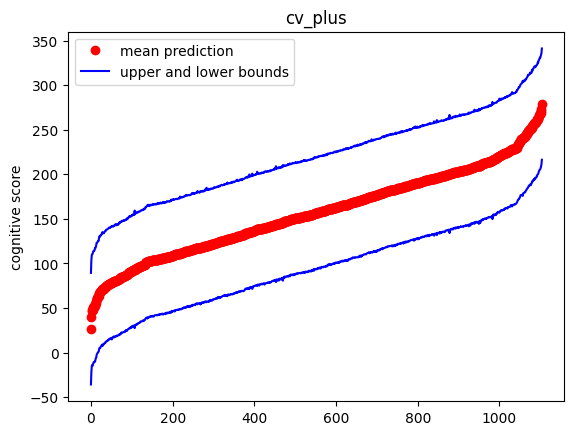

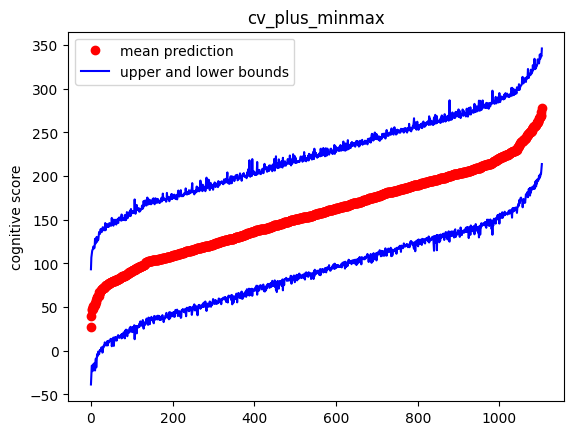

In [8]:
#!pip install mapie
import numpy as np
import pandas as pd
import pickle
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import shap
import os
from mapie.regression import (
    CrossConformalRegressor,
    JackknifeAfterBootstrapRegressor)
from sklearn.ensemble import VotingRegressor
from lightgbm import  LGBMRegressor
import warnings
warnings.filterwarnings("ignore")


base_dir = os.getcwd()
#set this to any other reasonable value e.g 0.5 for 50% or 0.3 for 30%
confidence_level = 0.9
# folds used for the cross-validation employed to compute the conformal scores
cv = 5
data_found =False

try:
    data_cat  = pd.read_csv(os.path.join(base_dir,'data','processed','data_cat.csv'),index_col=0)
    #data_gbm  = pd.read_csv(os.path.join(base_dir,'data','processed','data_gbm.csv'),index_col=0)
    y_train = pd.read_csv(os.path.join(base_dir, 'data','raw','train_labels.csv'))['composite_score']
    # this of course not used during the training
    #y_test = pd.read_csv(os.path.join(base_dir, 'data','raw','test_labels.csv'))['composite_score']
    data_found =True
except:
   print('data not found in the /data/processed folder. Please run the preprocess_data.py script first ')  
   

if data_found:
 
    print('All raw and pre-processed data found, training is starting now')    
    object_cols = data_cat.select_dtypes(include=['object']).columns
    for col in object_cols:
        data_cat[col] = data_cat[col].astype('category')
        #data_gbm[col] = data_gbm[col].astype('category')
    
    idx_train = range(int(len(y_train)))
    idx_test = range(len(y_train), data_cat.shape[0])

    float_cols = data_cat.select_dtypes(include=['float']).columns
    cat_cols = [
        i for i in data_cat.columns if (
            i not in float_cols) & (
                i != 'uid') & (
                    i != 'id')]
    ######################################################################### 

    # the  cv =-1 is the jacknife which is essentiall a leave-one-out approach
    # it is very slow computationally so we commented it out and only used it to generate the plots for the report
    STRATEGIES = {
    "cv_plus": {
        "class": CrossConformalRegressor,
        "init_params": dict(method="plus", cv = cv),
    },
    "cv_plus_minmax": {
        "class": CrossConformalRegressor,
        "init_params": dict(method="minmax", cv = cv),
    }
    }
    #,
    #"jackknife_plus_ab": {
    #"class": JackknifeAfterBootstrapRegressor,
    #"init_params": dict(method="plus", resampling=50),
#} ,
   
    
    ##same hyperparameters used in the initial models
    n1 = 250
    lgbm_reg = LGBMRegressor(max_depth = 5 , learning_rate = .05,n_estimators =n1, num_leaves =32, verbose  =-1)
    n2 = 800
    cat_reg = CatBoostRegressor(
        learning_rate =.05,
        max_depth = 5,
        iterations = n2,verbose =False, cat_features=list(
            data_cat.dtypes[data_cat.dtypes == 'category'].index),
        eval_metric='RMSE')
    


    res ={}
    for i, (strategy_name, strategy_params) in enumerate(STRATEGIES.items()):
        init_params = strategy_params["init_params"]
        class_ = strategy_params["class"]

        #weights used during Phase 2 25% lgbm and 75% catboost
        vr = VotingRegressor([('lightgbm',lgbm_reg), ('catboost',cat_reg)], weights = [.25, .75])
        #initialise the MAPIE model with a catboost regressor
        mapie = class_(vr
                , confidence_level = confidence_level, random_state=0, n_jobs = 1,**init_params
            )
        print('estimating confidence intervals with ' + strategy_name)
        #fit both models cv times ( 5 in this example), as specified in the STRATEGIES dictionary
        mapie.fit_conformalize(data_cat.iloc[idx_train], y_train)   
        #average prediction and corresponding confidence interval for each subject in the test set
        y_pred, y_pis = mapie.predict_interval(data_cat.iloc[idx_test])
        res[strategy_name+ 'mean'] = y_pred
        res[strategy_name+ 'ci'] = y_pis
        
        
    for i, (strategy_name, strategy_params) in enumerate(STRATEGIES.items()):
          y_pred =   res[strategy_name+ 'mean'] 
          y_pis = res[strategy_name+ 'ci'] 
         
          idx = np.argsort(y_pred)
       
          plt.figure()
          plt.plot(y_pred[idx], 'or')
          plt.plot(y_pis[idx,1,0], 'b')
          plt.plot(y_pis[idx,0,0], 'b')
          plt.title(strategy_name)
          plt.legend(['mean prediction','upper and lower bounds'])
          plt.ylabel('cognitive score')
        
    

<font size="6">  
Shapley Values and Visualization
</font> 


All raw and pre-processed data found, training is starting now
estimating confidence intervals with cv_plus
plots for subject 39 generated. Confidence intervals computed with cv_plus


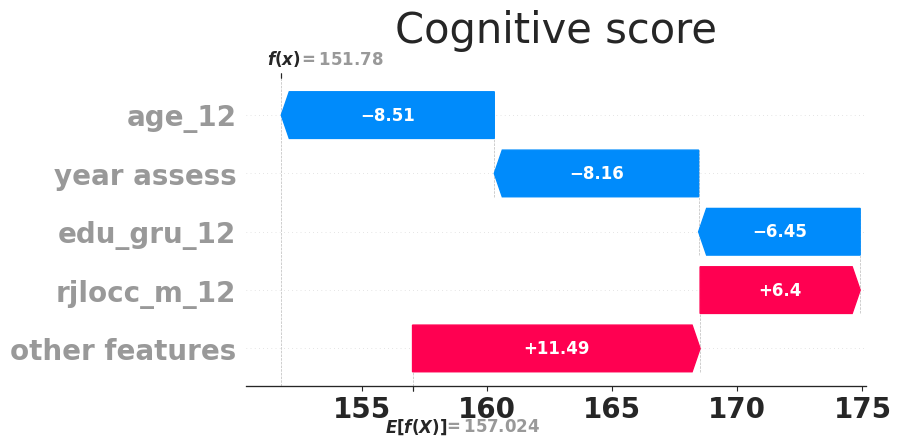

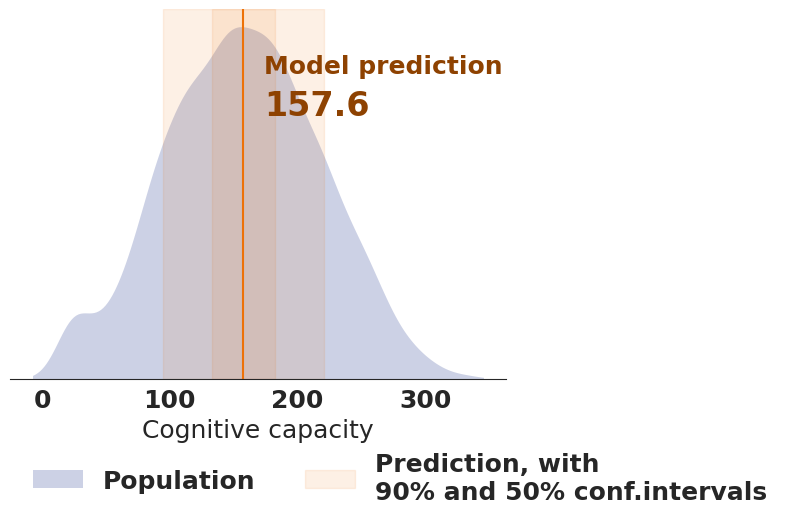

In [19]:
import numpy as np
import pandas as pd
import pickle
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import shap
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from mapie.regression import (
    CrossConformalRegressor,
    JackknifeAfterBootstrapRegressor)
import warnings
warnings.filterwarnings("ignore")
import matplotlib
font = {'weight' : 'bold',
            'size'   : 12}

matplotlib.rc('font', **font)

    
#------------------------------------------------------------------------------
#some of the visualization code was taken from this repo
#https://github.com/nicknettleton/PREPARE-Challenge
def visualise_prediction(
    pred, ci_1,
    ci_2,
    true_score):

    sns.set_palette('dark')
    sns.set_style('white')
    
    color = ('#ed7208', '#8e4201') 
    figure, ax = plt.subplots(1, 1)
    # plt.suptitle('Your prediction\ncompared to population', y=1)

    # Population chart
    sns.kdeplot(
        data = true_score,
        x = 'composite_score',
        fill = True,
        ax = ax,
        alpha = 0.2,
        linewidth = 0,
        cut = True
    )

    # Individual chart
    y = ax.get_ylim()
    p = pred
    ax.fill_betweenx(
        y, [ci_1[0]],[ci_1[1]],
        alpha=0.1,
        color=color[0]
    )
    ax.fill_betweenx(
        y, [ci_2[0]], [ci_2[1]],
        alpha=0.1,
        color=color[0]
    )
    
    ax.plot([p,p],y, '-', color=color[0])
    ax.annotate('Model prediction\n',
                (p,0),
                textcoords="offset points",
                xytext=(15,200),
                ha='left',
                color=color[1],
               )
    ax.annotate(str(p),
                (p,0),
                textcoords="offset points",
                xytext=(15,190),
                ha='left',
                color=color[1],
                fontsize=24
               )

    # General plot formatting
    ax.set_xlabel('Cognitive capacity')
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.legend([
        'Population',
        'Prediction, with\n90% and 50% conf.intervals'
    ], loc='lower left', bbox_to_anchor=(0, -0.4), frameon=False, ncol=2)

    ax.set_ylim(y)
    sns.despine(ax=ax, left=True)


base_dir = os.getcwd()
data_found = False


try:
    data_cat  = pd.read_csv(os.path.join(base_dir,'data','processed','data_cat.csv'),index_col=0)
    y_train_all = pd.read_csv(os.path.join(base_dir, 'data','raw','train_labels.csv'))
    y_train =  y_train_all['composite_score']
    models ={}
    a = open(os.path.join(base_dir,'models','catboost_fitted.pkl'),'rb')
    models['cat' ] =pickle.load(a)
    a.close()
    
    data_found =True
except:
   print('data not found in the /data/processed folder. Please run the preprocess_data.py script first ')  
   

if data_found:
    #all these settings can be changed
    confidence_level1 =.5
    confidence_level2 =.9
    #subject whose reusults will be displayed. change at pleasure
    subject = 39
    
    print('All raw and pre-processed data found, training is starting now')    
    object_cols = data_cat.select_dtypes(include=['object']).columns
    for col in object_cols:
        data_cat[col] = data_cat[col].astype('category')

    
    idx_train = range(int(len(y_train)))
    idx_test = range(len(y_train), data_cat.shape[0])

    float_cols = data_cat.select_dtypes(include=['float']).columns
    cat_cols = [
        i for i in data_cat.columns if (
            i not in float_cols) & (
                i != 'uid') & (
                    i != 'id')]
    ######################################################################### 

    sub_explanations = {}
    sub_expected_values = []
    for name, estimator in models.items():#ensemble.named_estimators_.items():
    
        explainer = shap.Explainer(estimator)
        explanation = explainer(data_cat.iloc[idx_test])
 
    ensemble_shap_values     = explanation
    ensemble_expected_value  = explainer.expected_value

    
    STRATEGIES = {
    "cv_plus": {
        "class": CrossConformalRegressor,
        "init_params": dict(method="plus", cv = 5),
    }
   }

    res ={}
    for i, (strategy_name, strategy_params) in enumerate(STRATEGIES.items()):
        init_params = strategy_params["init_params"]
        class_ = strategy_params["class"]
        n2 = 800
        model = CatBoostRegressor(
             learning_rate = .05,
             max_depth = 5,
             iterations=n2, cat_features=list(
                  data_cat.dtypes[data_cat.dtypes == 'category'].index),
             eval_metric='RMSE', verbose = False)
                
        mapie = CrossConformalRegressor(model
                , confidence_level = [    confidence_level1,    confidence_level2], random_state=0, n_jobs = 1, **init_params)
        print('estimating confidence intervals with ' +strategy_name)
        #compue conformal scores
        mapie.fit_conformalize(data_cat.iloc[idx_train], y_train)   
        #average prediction and corresponding confidence interval for each subject in the test set
        y_pred, conf_intervals = mapie.predict_interval(data_cat.iloc[idx_test])
        #recenter making the prediction of the original model the mean and keeping the same width
        # that is needed as MAPIE computes te new average pred as EW average of the predictions of the 5 models
        width1_right   =   conf_intervals[:,1,0] - y_pred
        width1_left    =   conf_intervals[:,0,0] - y_pred
        width2_right   =   conf_intervals[:,1,1] - y_pred
        width2_left    =   conf_intervals[:,0,1] - y_pred
        
        y_pred = ensemble_shap_values .sum(1) + ensemble_expected_value
        
        #################################################################################
        ##DISPLAY
        ###############################
        ensemble_explanation = shap.Explanation(values = ensemble_shap_values[subject],
              feature_names = [i.replace('customer','patient')[:14] for i in data_cat.columns],    
              base_values=ensemble_expected_value)
        #from matplotlib.ticker import FormatStrFormatter
        font = {'weight' : 'bold',
  'size' : 30}
        matplotlib.rc('font', **font)
        
        fig, ax = plt.subplots()
        shap.plots.waterfall(  ensemble_explanation,5,show =False)
   
        plt.xlabel("Cognitive score")
        s = pd.Series(data = ensemble_shap_values[subject].values, index =  [i.replace('customer','patient').replace('of ','')[:11] for i in data_cat.columns])
        s =s.abs().sort_values()
        ax.tick_params(axis='both', which='major', labelsize = 20)
        #ax.set_ylabel('y-axis', fontsize = 200)
        plt.yticks( range(5),['other features'] +list(s.index[-4:]))
    
        
 
        ############################
        y_pred = ensemble_shap_values[subject].values[0].sum() + ensemble_expected_value
        font = {'weight' : 'bold',
  'size' : 18}
        matplotlib.rc('font', **font)
        visualise_prediction(
    round(y_pred,1), [y_pred +  width1_left[subject] , y_pred +  width1_right[subject]],
    [y_pred +  width2_left[subject] , y_pred +  width2_right[subject]], y_train_all)
        print('plots for subject ' +str(subject) +' generated. Confidence intervals computed with '+ strategy_name)
        plt.show()
     
